### The assignment is about predicting total sales for every product and store in the next month for a time series dataset consisting of daily sales data.


In [1]:
import numpy as np
import pandas as pd
from datetime import timezone, datetime
import plotly.express as px
import glob
import os
from dateutil.relativedelta import *
#pd.options.plotting.backend = "plotly"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
start_time  = datetime.now()
print(start_time)

2020-10-09 18:31:00.278541


### Create Results directory

In [3]:
# defin working directory
#yyyy-mm-dd hh:mm:ss.000
currentDir = os.getcwd()
#print (currentDir)
workingDir = currentDir+'\\Results\\'
print (workingDir)
if not os.path.exists(workingDir):
    os.makedirs(workingDir)


C:\Users\hijoh\OneDrive - Kapsch Group\Documents\1_PEO_Application\Job Applications\EY\Assignment 1\data science\Results\


In [4]:
#sales.csv: Daily historical data from January 2013 to October 2015.
#items.csv: supplemental information about the items/products.
#item_categories.csv: supplemental information about the items categories.
#shops.csv: supplemental information about the shops.
item_categories_df = pd.read_csv('item_categories.csv')
items_df = pd.read_csv('items.csv')
sales_df = pd.read_csv('sales.csv')
shops_df = pd.read_csv('shops.csv')

In [5]:
item_categories_df.head()

ID               item_category_name active_flag
0  25    Games - Accessories for games         NaN
1   5             Accessories - PSVita         NaN
2  62  Gifts - gadgets, robots, sports         NaN
3  15         Game consoles - XBOX 360         NaN
4  14           Game consoles - PSVita         NaN

In [6]:
len(item_categories_df)

95

#### drop any non active item cats

In [7]:
item_categories_df_active = item_categories_df.loc[item_categories_df['active_flag'] !='X']

####  upon inspect the original item_cat filem, there are lots of categories that overlaps, creating new larger category file/list item_root_categories.csv manually

In [8]:
list(set([i[0] for i in item_categories_df_active['item_category_name'].str.split(' ')]))

['Movie',
 'Utilities',
 'Игры',
 'Accessories',
 'Payment',
 'batteries',
 'Gifts',
 'Program',
 'Programs',
 'PC',
 'Tickets',
 'Cinema',
 'Game',
 'Books',
 'Games',
 'Delivery',
 'Music',
 'Net',
 'Movies',
 'System']

In [9]:
item_root_categories_df = pd.read_csv('item_root_categories.csv')
item_root_categories_df_active = item_root_categories_df.loc[item_root_categories_df['active_flag'] !='X']
item_root_categories_df_active

ID                    item_category_name  root_category active_flag
0    1                     Accessories - PS2    Accessories         NaN
1    2                     Accessories - PS3    Accessories         NaN
2    3                     Accessories - PS4    Accessories         NaN
4    4                     Accessories - PSP    Accessories         NaN
5    5                  Accessories - PSVita    Accessories         NaN
7    6                Accessories - XBOX 360    Accessories         NaN
8    7                Accessories - XBOX ONE    Accessories         NaN
9   83                             batteries      batteries         NaN
10  42         Books - artbook, encyclopedia          Books         NaN
11  43                    Books - Audiobooks          Books         NaN
12  44           Books - Audiobooks (figure)          Books         NaN
13  45                 Books - Audiobooks 1C          Books         NaN
14  46                Books - Business Books          Books         NaN
15  47                 Books - Comics, Manga          Books         NaN
16  48                Books - Computer Books          Books         NaN
17  54                       Books - Digital          Books         NaN
18  53                       Books - Fiction          Books         NaN
19  51        Books - Informative literature          Books         NaN
20  49       Books - Methodical materials 1C          Books         NaN
21  50                     Books - Postcards          Books         NaN
22  52                 Books - Travel Guides          Books         NaN
23  41                    Cinema - Collector         Cinema         NaN
24  24                       Игры - XBOX ONE          Games         NaN
25   9                     Delivery of goods       Delivery         NaN
26  17                 Game consoles - Other  Game consoles         NaN
27  10                   Game consoles - PS2  Game consoles         NaN
28  11                   Game consoles - PS3  Game consoles         NaN
29  12                   Game consoles - PS4  Game consoles         NaN
30  13                   Game consoles - PSP  Game consoles         NaN
31  14                Game consoles - PSVita  Game consoles         NaN
32  15              Game consoles - XBOX 360  Game consoles         NaN
33  16              Game consoles - XBOX ONE  Game consoles         NaN
35  25         Games - Accessories for games    Accessories         NaN
37  18                           Games - PS2          Games         NaN
38  19                           Games - PS3          Games         NaN
39  20                           Games - PS4          Games         NaN
40  21                           Games - PSP          Games         NaN
41  22                        Games - PSVita          Games         NaN
42  23                      Games - XBOX 360          Games         NaN
43  26               Games Android - Digital          Games         NaN
44  27                   Games MAC - Digital          Games         NaN
45  28    Games PC - Additional publications          Games         NaN
46  29        Games PC - Collector's Edition          Games         NaN
47  31                    Games PC - Digital          Games         NaN
48  30           Games PC - Standard Edition          Games         NaN
49  61                    Gifts - Attributes          Gifts         NaN
50  71  Gifts - Bags, Albums, Mats d / mouse          Gifts         NaN
51  64                   Gifts - Board Games          Gifts         NaN
52  66               Gifts - Cards, Stickers          Gifts         NaN
54  68        Gifts - certificates, services          Gifts         NaN
56  67                   Gifts - Development          Gifts         NaN
58  72                       Gifts - Figures          Gifts         NaN
59  62       Gifts - gadgets, robots, sports          Gifts         NaN
60  65               Gifts - Games (compact)          Gifts         NaN
62  63                     Gifts - Soft Toys

In [10]:
items_df

item_name     id  category
0                           ! POWER IN glamor (PLAST.) D      0        40
1      ! ABBYY FineReader 12 Professional Edition Ful...      1        76
2                               *** In the glory (UNV) D      2        40
3                                 *** BLUE WAVE (Univ) D      3        40
4                                      *** BOX (GLASS) D      4        40
...                                                  ...    ...       ...
22165             Nuclear titbit 2 [PC, Digital Version]  22165        31
22166    Язык запросов 1С:Предприятия  [Цифровая версия]  22166        54
22167  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...  22167        49
22168                                Яйцо для Little Inu  22168        62
22169                      Яйцо дракона (Игра престолов)  22169        69

[22170 rows x 3 columns]

In [11]:
sales_df

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0        02.01.2013               0       59    22154      999.00           1.0
1        03.01.2013               0       25     2552      899.00           1.0
2        05.01.2013               0       25     2552      899.00          -1.0
3        06.01.2013               0       25     2554     1709.05           1.0
4        15.01.2013               0       25     2555     1099.00           1.0
...             ...             ...      ...      ...         ...           ...
2935844  10.10.2015              33       25     7409      299.00           1.0
2935845  09.10.2015              33       25     7460      299.00           1.0
2935846  14.10.2015              33       25     7459      349.00           1.0
2935847  22.10.2015              33       25     7440      299.00           1.0
2935848  03.10.2015              33       25     7460      299.00           1.0

[2935849 rows x 6 columns]

In [12]:
shops_df

system_id                                            name  id active_flag
0    R395989                         Voronezh TRC "Maksimir"   7           X
1    Q222502                                Zhukovsky Street  11           X
2     B70025           RostovNaDonu TRC "Megacenter Horizon"  39         NaN
3    U750976               ! Yakutsk Ordzhonikidze, 56 Franc   0         NaN
4    F831253                         Shop Online Emergencies  12         NaN
5    Q647150                              Kursk TC "Pushkin"  19         NaN
6    B842459                         Tyumen SC "Green Coast"  51         NaN
7    E294443                         Digital storage 1C-line  55         NaN
8    P595692                      Volzhsky mall "Volga Mall"   4         NaN
9    P529565                   Voronezh (Plekhanovskaya, 13)   6         NaN
10    F94795          Moscow shopping mall "area" (Belyaevo)  26         NaN
11   B879440           Moscow shopping center "Silver House"  32         NaN
12   Q523230                          Surgut SEC "City Mall"  47         NaN
13   T366056                  Zhukovsky Street. Chkalov 39m²  11         NaN
14   S296273                                Kolomna TC "Rio"  16         NaN
15   S262265                            Mytishchi TRK "XL-3"  33         NaN
16    B30595                     St. Petersburg TK "Sennaya"  43         NaN
17   M673597               St. Petersburg TK "Nevsky Center"  42         NaN
18   F381091                                 Itinerant trade   9           X
19   C457952  Moscow shopping center "MEGA Teply Stan" II of  28         NaN
20   Z363933                   Voronezh (Plekhanovskaya, 13)   6           X
21   C103669                 Moscow TK "Budenovsky" (pav.A2)  23         NaN
22   C861232   Moscow shopping center "MEGA Belaya Dacha II"  27         NaN
23   H375182               Moscow shopping center "Semyonov"  31         NaN
24   G957470              Yaroslavl shopping center "Altair"  59         NaN
25   I684643                                            test   0           X
26   X938753                         Moscow MTRTS "Afi Mall"  21         NaN
27    R13769    RostovNaDonu TRC "Megacenter Horizon" Island  40         NaN
28   K337792                                Khimki TC "Mega"  54         NaN
29   Z893465                          Moscow TC "Perlovskiy"  30         NaN
30   P433840                    ! Yakutsk TC "Central" Franc   1         NaN
31   Y503592                                Adygea TC "Mega"   2         NaN
32   V205345                   Voronezh TRC City-Park "City"   8         NaN
33     R6061                         Shop Online Emergencies  12           X
34    T70601                           Novosibirsk TC "Mega"  37         NaN
35    N62262                   Voronezh TRC City-Park "City"   8           X
36   O815947                 Kazan shopping center "Bahetle"  13         NaN
37   E358694                         Voronezh TRC "Maksimir"   7         NaN
38    Q37669                                Ufa TC "Central"  52         NaN
39   G500531                           Czechs SEC "Carnival"  56         NaN
40   N480091                            Yakutsk TC "Central"  58         NaN
41   S632113                         Vologda SEC "Marmalade"   5         NaN
42   C242489        Kazan shopping mall of "Parkhouse" II of  14         NaN
43   X204695                 Moscow TK "Budenovsky" (pav.K7)  24         NaN
44   B284143                                Zhukovsky Street  10           X
45   U501840                        Kaluga SEC "XXI Century"  15         NaN
46   S624183                            Tyumen SEC "Crystal"  49         NaN
47   P750258                       Yakutsk Ordzhonikidze, 56  57         NaN
48   B882047                             Moscow TRC "Atrium"  25         NaN
49   H229347                              Samara TC "Melody"  44         NaN
50   B875625                Balashikha TRC "October-Kinomir"   3         NaN

### Remove non active shops

In [13]:
shops_df_active = shops_df.loc[shops_df['active_flag'] !='X']

In [14]:
#shops_df_active.groupby(['id'])['system_id'].unique().to_frame().reset_index()


In [15]:
len(shops_df_active.id.unique()),len(shops_df_active)

(60, 60)

### Join the sales data with shop data , also dropped the active flag column since all active

#### assume date_block_num is some sort of week number, item_cnt_day is the number of unit sold or returned (-1), active_flag 'X' means not active

In [16]:
sales_df_working = sales_df.set_index('shop_id').join(shops_df_active.set_index('id')).iloc[:, :-1]
sales_df_working

date  date_block_num  item_id  item_price  item_cnt_day system_id                                name
0   12.01.2013               0    11059        73.0           1.0   U750976   ! Yakutsk Ordzhonikidze, 56 Franc
0   22.01.2013               0    11059        73.0           1.0   U750976   ! Yakutsk Ordzhonikidze, 56 Franc
0   26.01.2013               0    11059        73.0           1.0   U750976   ! Yakutsk Ordzhonikidze, 56 Franc
0   12.01.2013               0    11347       170.0           1.0   U750976   ! Yakutsk Ordzhonikidze, 56 Franc
0   22.01.2013               0    11347       170.0           1.0   U750976   ! Yakutsk Ordzhonikidze, 56 Franc
..         ...             ...      ...         ...           ...       ...                                 ...
59  10.10.2015              33     4962       298.0           1.0   G957470  Yaroslavl shopping center "Altair"
59  04.10.2015              33     4706       299.0           1.0   G957470  Yaroslavl shopping center "Altair"
59  11.10.2015              33     5002      2999.0           1.0   G957470  Yaroslavl shopping center "Altair"
59  15.10.2015              33     5233      1199.0           1.0   G957470  Yaroslavl shopping center "Altair"
59  21.10.2015              33     5039      1499.0           1.0   G957470  Yaroslavl shopping center "Altair"

[2935849 rows x 7 columns]

#### checking for any empty value

In [17]:
sales_df_working.isnull().sum()/len(sales_df_working)*100

date              0.000000
date_block_num    0.000000
item_id           0.000000
item_price        0.000000
item_cnt_day      0.001703
system_id         0.000000
name              0.000000
dtype: float64

### join the item df and item catigory dfs also dropped the and active flag column

In [18]:
item_and_categories_df_working = items_df.set_index('category').join(item_root_categories_df_active.set_index('ID'))
item_and_categories_df_working = item_and_categories_df_working.reset_index().iloc[:, 1:-1]
item_and_categories_df_working

item_name     id          item_category_name root_category
0      PC: Headset HyperX Cloud Core's stereo (KHX-HS...   5441  PC - Headsets / Headphones   Accessories
1                            Nauşniki PHILIPS SBC HC8680  16255  PC - Headsets / Headphones   Accessories
2                               Headphones RITMIX RH-120  16256  PC - Headsets / Headphones   Accessories
3                           Наушники RITMIX RH-124 Black  16257  PC - Headsets / Headphones   Accessories
4      PS2: Memory Card 8 MB Black (Memory Card 8Mb -...   5606           Accessories - PS2   Accessories
...                                                  ...    ...                         ...           ...
22165        Battery GP 15AU (LR6) - Blister 2 pcs Ultra  22095                   batteries     batteries
22166              Battery GP 24A (LR03) - Blister 2 pcs  22096                   batteries     batteries
22167       Battery GP 24AU (LR03) - Blister 2 pcs Ultra  22097                   batteries     batteries
22168                   Элемент питания КОСМОС LR03 2*BL  22098                   batteries     batteries
22169  Элемент питания СТАРТ ZT 15A (LR6) - Блистер 2 шт  22099                   batteries     batteries

[22170 rows x 4 columns]

### Now Join the sales_df_working with item_and_categories_df_working to create the final starter df

In [19]:
sales_df_working_final = sales_df_working.set_index('item_id').join(item_and_categories_df_working.set_index('id'))
sales_df_working_final

date  date_block_num  item_price  item_cnt_day system_id                               name                                          item_name                 item_category_name root_category
0      01.09.2014              20        58.0           1.0   K337792                   Khimki TC "Mega"                       ! POWER IN glamor (PLAST.) D                        Movie - DVD        Movies
1      04.04.2014              15      4490.0           1.0   E294443            Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs
1      02.04.2014              15      4490.0           1.0   E294443            Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs
1      06.07.2014              18      4490.0           1.0   E294443            Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs
1      04.08.2014              19      4490.0           1.0   E294443            Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs
...           ...             ...         ...           ...       ...                                ...                                                ...                                ...           ...
22168  13.09.2013               8       799.0           1.0   F831253            Shop Online Emergencies                                Яйцо для Little Inu    Gifts - gadgets, robots, sports         Gifts
22168  17.02.2013               1       799.0           1.0   S296273                   Kolomna TC "Rio"                                Яйцо для Little Inu    Gifts - gadgets, robots, sports         Gifts
22168  02.02.2013               1       799.0           1.0   M673597  St. Petersburg TK "Nevsky Center"                                Яйцо для Little Inu    Gifts - gadgets, robots, sports         Gifts
22168  08.03.2013               2       798.5           1.0    B30595        St. Petersburg TK "Sennaya"                                Яйцо для Little Inu    Gifts - gadgets, robots, sports         Gifts
22169  21.03.2014              14      4349.0           1.0   B882047                Moscow TRC "Atrium"                      Яйцо дракона (Игра престолов)                  Gifts - Souvenirs         Gifts

[2935849 rows x 9 columns]

#### covert date column to datetime object

In [20]:
sales_df_working_final['date'] = sales_df_working_final['date'].astype(np.datetime64())

#### Create sales revenue column = item_price x item_cnt_day

In [21]:
sales_df_working_final['revenue'] = sales_df_working_final['item_price']*sales_df_working_final['item_cnt_day']

In [22]:
sales_df_working_final

date  date_block_num  item_price  item_cnt_day system_id                               name                                          item_name                 item_category_name root_category  revenue
0     2014-01-09              20        58.0           1.0   K337792                   Khimki TC "Mega"                       ! POWER IN glamor (PLAST.) D                        Movie - DVD        Movies     58.0
1     2014-04-04              15      4490.0           1.0   E294443            Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs   4490.0
1     2014-02-04              15      4490.0           1.0   E294443            Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs   4490.0
1     2014-06-07              18      4490.0           1.0   E294443            Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs   4490.0
1     2014-04-08              19      4490.0           1.0   E294443            Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs   4490.0
...          ...             ...         ...           ...       ...                                ...                                                ...                                ...           ...      ...
22168 2013-09-13               8       799.0           1.0   F831253            Shop Online Emergencies                                Яйцо для Little Inu    Gifts - gadgets, robots, sports         Gifts    799.0
22168 2013-02-17               1       799.0           1.0   S296273                   Kolomna TC "Rio"                                Яйцо для Little Inu    Gifts - gadgets, robots, sports         Gifts    799.0
22168 2013-02-02               1       799.0           1.0   M673597  St. Petersburg TK "Nevsky Center"                                Яйцо для Little Inu    Gifts - gadgets, robots, sports         Gifts    799.0
22168 2013-08-03               2       798.5           1.0    B30595        St. Petersburg TK "Sennaya"                                Яйцо для Little Inu    Gifts - gadgets, robots, sports         Gifts    798.5
22169 2014-03-21              14      4349.0           1.0   B882047                Moscow TRC "Atrium"                      Яйцо дракона (Игра престолов)                  Gifts - Souvenirs         Gifts   4349.0

[2935849 rows x 10 columns]

### get the monthly revenue per store

In [23]:
sales_df_working_final_store_revenue = sales_df_working_final.set_index('date').groupby(['name']).resample("M").aggregate({'revenue':'sum'}).reset_index()
sales_df_working_final_store_revenue

name       date     revenue
0     ! Yakutsk Ordzhonikidze, 56 Franc 2013-01-31  1852216.00
1     ! Yakutsk Ordzhonikidze, 56 Franc 2013-02-28  2370079.00
2     ! Yakutsk Ordzhonikidze, 56 Franc 2013-03-31   196170.00
3     ! Yakutsk Ordzhonikidze, 56 Franc 2013-04-30   286906.00
4     ! Yakutsk Ordzhonikidze, 56 Franc 2013-05-31   307978.00
...                                 ...        ...         ...
1861     Zhukovsky Street. Chkalov 39m² 2015-08-31    42064.69
1862     Zhukovsky Street. Chkalov 39m² 2015-09-30     9525.00
1863     Zhukovsky Street. Chkalov 39m² 2015-10-31     8844.00
1864     Zhukovsky Street. Chkalov 39m² 2015-11-30     6733.00
1865     Zhukovsky Street. Chkalov 39m² 2015-12-31    33444.00

[1866 rows x 3 columns]

In [24]:
import plotly.express as px
df = px.data.gapminder()
fig = px.line(sales_df_working_final_store_revenue, x="date", y="revenue", color="name", line_group="name", hover_name="name",
        line_shape="spline", render_mode="svg")

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()


In [25]:
(sales_df_working_final.loc[(sales_df_working_final['date']>='10.1.2013')&
                           (sales_df_working_final['date']<='10.31.2013')&
                           (sales_df_working_final['item_price']>=60000)]['date'].count())/(sales_df_working_final.loc[(sales_df_working_final['date']>='10.1.2013')&
                           (sales_df_working_final['date']<='10.31.2013')&
                           (sales_df_working_final['item_price']>=0)]['date'].count())

0.2471310788362772

### visulization indicated that October 2013 has wrong data input potentialy more than 100X, therefore Oct 2013 sales will be devided by 100 or more anything more than threshold in item price

In [26]:
threshold = 6000
sales_df_working_final_oct = sales_df_working_final.loc[(sales_df_working_final['date']>='10.1.2013')&
                                                        (sales_df_working_final['date']<='10.31.2013')&
                                                        (sales_df_working_final['item_price']>=threshold)]
sales_df_working_final_oct_adj = sales_df_working_final_oct.copy()
sales_df_working_final_oct_adj['item_price'] = sales_df_working_final_oct_adj['item_price']/100


sales_df_working_final_oct_exclude = sales_df_working_final.loc[~((sales_df_working_final['date']>='10.1.2013')&
                                                        (sales_df_working_final['date']<='10.31.2013')&
                                                        (sales_df_working_final['item_price']>=threshold))]
sales_df_working_final_adj= pd.concat([sales_df_working_final_oct_exclude, sales_df_working_final_oct_adj], ignore_index=True)

In [27]:
sales_df_working_final_adj

date  date_block_num  item_price  item_cnt_day system_id                                name                                          item_name                 item_category_name root_category  revenue
0       2014-01-09              20        58.0           1.0   K337792                    Khimki TC "Mega"                       ! POWER IN glamor (PLAST.) D                        Movie - DVD        Movies     58.0
1       2014-04-04              15      4490.0           1.0   E294443             Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs   4490.0
2       2014-02-04              15      4490.0           1.0   E294443             Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs   4490.0
3       2014-06-07              18      4490.0           1.0   E294443             Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs   4490.0
4       2014-04-08              19      4490.0           1.0   E294443             Digital storage 1C-line  ! ABBYY FineReader 12 Professional Edition Ful...  Program - Home & Office (Digital)      Programs   4490.0
...            ...             ...         ...           ...       ...                                 ...                                                ...                                ...           ...      ...
2935844 2013-10-05               9       299.0           1.0   W365183                   Ufa TC "Family" 2  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    Books - Methodical materials 1C         Books  29900.0
2935845 2013-10-04               9       299.0           1.0   W365183                   Ufa TC "Family" 2  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    Books - Methodical materials 1C         Books  29900.0
2935846 2013-10-19               9       299.0           1.0   K337792                    Khimki TC "Mega"  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    Books - Methodical materials 1C         Books  29900.0
2935847 2013-10-18               9       299.0           1.0   K337792                    Khimki TC "Mega"  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    Books - Methodical materials 1C         Books  29900.0
2935848 2013-10-25               9       299.0           1.0   G957470  Yaroslavl shopping center "Altair"  Язык запросов 1С:Предприятия 8 (+CD). Хрустале...    Books - Methodical materials 1C         Books  29900.0

[2935849 rows x 10 columns]

### Get Revised Monthly revenue

In [28]:
sales_df_working_final_adj['revenue'] = sales_df_working_final_adj['item_price']*sales_df_working_final_adj['item_cnt_day']
sales_df_working_final_store_cat_revenue_adj = sales_df_working_final_adj.set_index('date').groupby(['name','root_category']).resample("M").aggregate({'revenue':'sum'}).reset_index()
sales_df_working_final_store_revenue_adj = sales_df_working_final_adj.set_index('date').groupby(['name']).resample("M").aggregate({'revenue':'sum'}).reset_index()


In [29]:
import plotly.express as px
df = px.data.gapminder()
fig = px.line(sales_df_working_final_store_revenue_adj, x="date", y="revenue", color="name", line_group="name", hover_name="name",
        line_shape="spline", render_mode="svg")

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()


### Now the sales data looks normal and we can start model building

In [30]:
sales_df_working_final_store_cat_revenue_adj['store_cat'] = sales_df_working_final_store_cat_revenue_adj['name']+'_'+sales_df_working_final_store_cat_revenue_adj['root_category']
sales_df_working_final_store_cat_revenue_adj = sales_df_working_final_store_cat_revenue_adj.iloc[:, 2:]


In [31]:
each_store_cat = sales_df_working_final_store_cat_revenue_adj['store_cat'].unique().tolist()[100]
each_store_cat

'Kazan shopping mall of "Parkhouse" II of_Books'

In [32]:
store_sales_df = sales_df_working_final_store_cat_revenue_adj.loc[(sales_df_working_final_store_cat_revenue_adj['store_cat']==each_store_cat)]
store_sales_df = store_sales_df[['date','revenue']].set_index('date')
store_sales_df

revenue
date               
2013-01-31   2488.0
2013-02-28   4495.0
2013-03-31   5027.0
2013-04-30   3257.0
2013-05-31    349.0
2013-06-30    249.0
2013-07-31   3755.0
2013-08-31   2587.0
2013-09-30   1767.0
2013-10-31   5616.0
2013-11-30    649.0
2013-12-31   1898.0
2014-01-31    648.0
2014-02-28   1387.0
2014-03-31   6457.0
2014-04-30    789.0
2014-05-31   1208.0
2014-06-30   2107.0
2014-07-31    698.0
2014-08-31   3483.0
2014-09-30      0.0
2014-10-31   2226.0
2014-11-30   2046.0
2014-12-31   2633.0
2015-01-31   8395.0
2015-02-28   5042.0
2015-03-31   4214.0
2015-04-30   4045.0
2015-05-31  20591.0
2015-06-30   8816.0
2015-07-31  13539.0
2015-08-31   8149.0
2015-09-30  17218.0
2015-10-31  42308.0
2015-11-30   5684.0
2015-12-31   5943.0

In [33]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### using decomposition to visualize per store data

In [34]:
store_sales_df

revenue
date               
2013-01-31   2488.0
2013-02-28   4495.0
2013-03-31   5027.0
2013-04-30   3257.0
2013-05-31    349.0
2013-06-30    249.0
2013-07-31   3755.0
2013-08-31   2587.0
2013-09-30   1767.0
2013-10-31   5616.0
2013-11-30    649.0
2013-12-31   1898.0
2014-01-31    648.0
2014-02-28   1387.0
2014-03-31   6457.0
2014-04-30    789.0
2014-05-31   1208.0
2014-06-30   2107.0
2014-07-31    698.0
2014-08-31   3483.0
2014-09-30      0.0
2014-10-31   2226.0
2014-11-30   2046.0
2014-12-31   2633.0
2015-01-31   8395.0
2015-02-28   5042.0
2015-03-31   4214.0
2015-04-30   4045.0
2015-05-31  20591.0
2015-06-30   8816.0
2015-07-31  13539.0
2015-08-31   8149.0
2015-09-30  17218.0
2015-10-31  42308.0
2015-11-30   5684.0
2015-12-31   5943.0

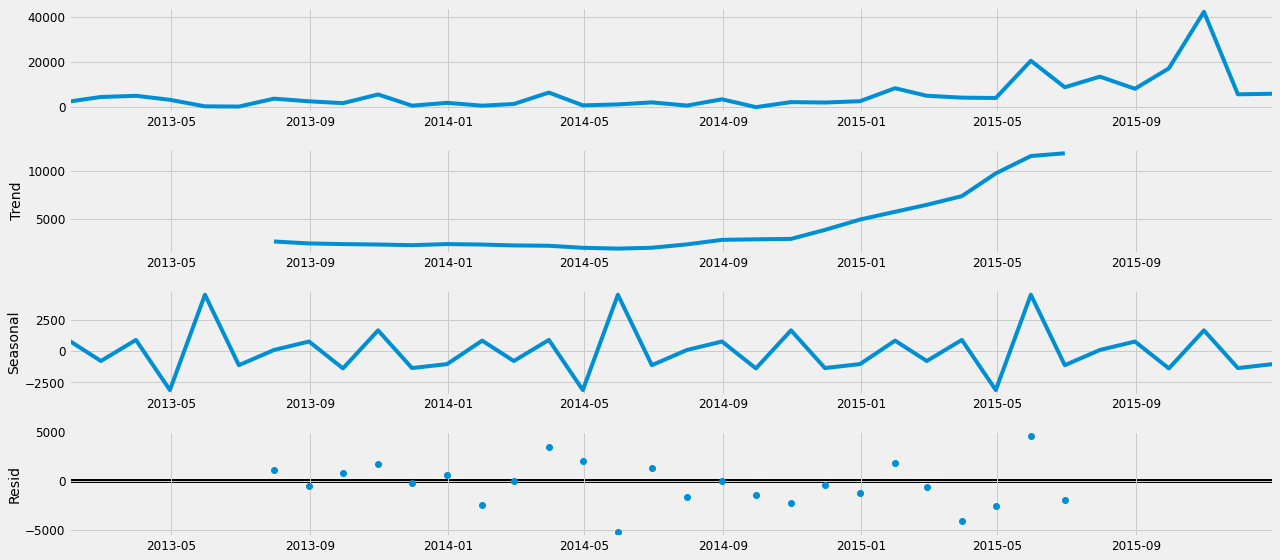

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(store_sales_df, model='additive')
fig = decomposition.plot()
plt.show()

In [36]:
'''The first step before getting bogged down in data analysis and modeling is to establish a baseline of performance.

This will provide both a template for evaluating models using the proposed test harness and a performance measure by which all more elaborate predictive models can be compared.

The baseline prediction for time series forecasting is called the naive forecast, or persistence.

This is where the observation from the previous time step is used as the prediction for the observation at the next time step.

We can plug this directly into the test harness defined in the previous section'''


'The first step before getting bogged down in data analysis and modeling is to establish a baseline of performance.\n\nThis will provide both a template for evaluating models using the proposed test harness and a performance measure by which all more elaborate predictive models can be compared.\n\nThe baseline prediction for time series forecasting is called the naive forecast, or persistence.\n\nThis is where the observation from the previous time step is used as the prediction for the observation at the next time step.\n\nWe can plug this directly into the test harness defined in the previous section'

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
# load data
series = store_sales_df
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	#print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mae = mean_absolute_error(test, predictions)
#rmse = sqrt(mse)
print('Benchmark MAE: %.3f' % mae)


Benchmark MAE: 7236.556


### Time series forecasting with SARIMAX

#### find the optimal set of parameters that yields the best performance for our model

In [38]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
search_result_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store_sales_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            search_result_list.append((param,param_seasonal,results.mae))
            #print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

best_parm = min(search_result_list, key = lambda i : i[2])[:]
print('best Parameters: ',best_parm)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was

best Parameters:  ((0, 1, 1), (0, 0, 0, 12), 3676.8293221006024)


In [40]:
mod = sm.tsa.statespace.SARIMAX(store_sales_df,
                                order=best_parm[0],
                                seasonal_order=best_parm[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7628      0.067    -11.360      0.000      -0.894      -0.631
sigma2      5.538e+07   3.98e-10   1.39e+17      0.000    5.54e+07    5.54e+07


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



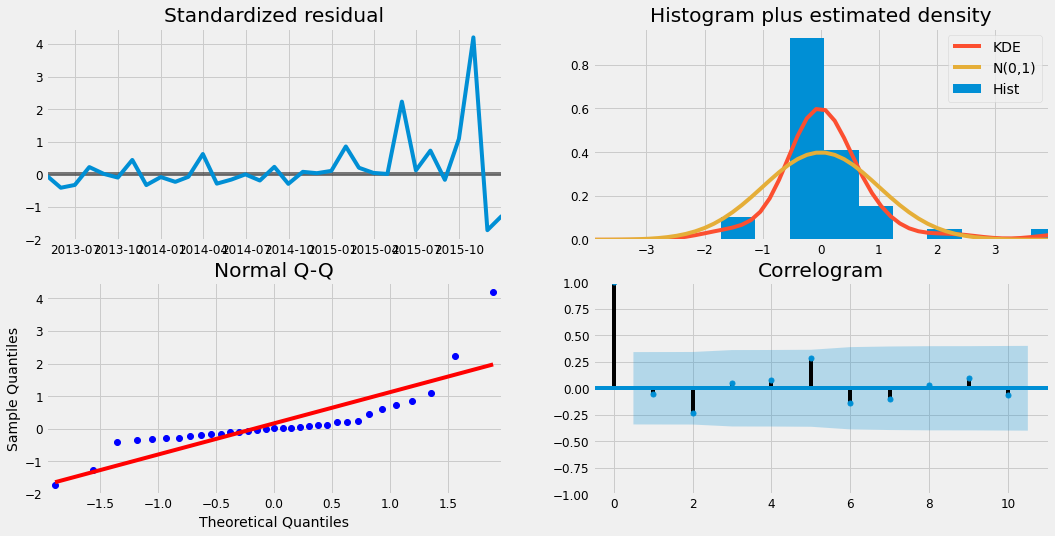

In [41]:
try:
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
except:
    pass

### Validating forecasts

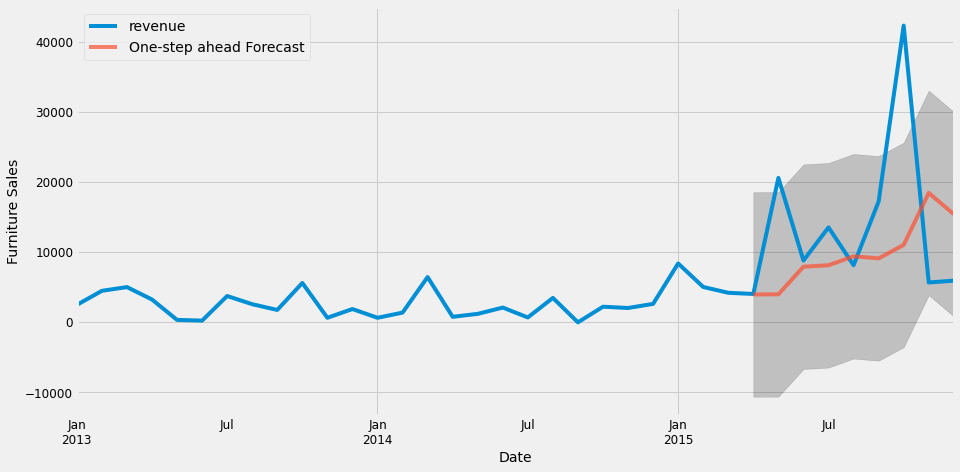

In [62]:
pred = results.get_prediction(start=pd.to_datetime('2015-4-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = store_sales_df['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [84]:
store_sales_df_forecasted = pred.predicted_mean
store_sales_df_truth = store_sales_df['2015-04-30':]
mse = ((store_sales_df_forecasted - store_sales_df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2015-04-30 00:00:00   NaN
2015-05-31 00:00:00   NaN
2015-06-30 00:00:00   NaN
2015-07-31 00:00:00   NaN
2015-08-31 00:00:00   NaN
2015-09-30 00:00:00   NaN
2015-10-31 00:00:00   NaN
2015-11-30 00:00:00   NaN
2015-12-31 00:00:00   NaN
revenue               NaN
dtype: float64


In [85]:
store_sales_df['2015-04-30':]

revenue
date               
2015-04-30   4045.0
2015-05-31  20591.0
2015-06-30   8816.0
2015-07-31  13539.0
2015-08-31   8149.0
2015-09-30  17218.0
2015-10-31  42308.0
2015-11-30   5684.0
2015-12-31   5943.0

In [81]:
store_sales_df_forecasted

2015-04-30     3977.445236
2015-05-31     3993.468179
2015-06-30     7930.145398
2015-07-31     8140.256373
2015-08-31     9420.754638
2015-09-30     9119.114161
2015-10-31    11040.044274
2015-11-30    18456.318419
2015-12-31    15426.922586
Freq: M, dtype: float64

In [83]:
store_sales_df_truth

2015-04-30     3977.445236
2015-05-31     3993.468179
2015-06-30     7930.145398
2015-07-31     8140.256373
2015-08-31     9420.754638
2015-09-30     9119.114161
2015-10-31    11040.044274
2015-11-30    18456.318419
2015-12-31    15426.922586
Freq: M, dtype: float64

In [79]:
247160977-53292008

193868969

## Producing and visualizing forecasts

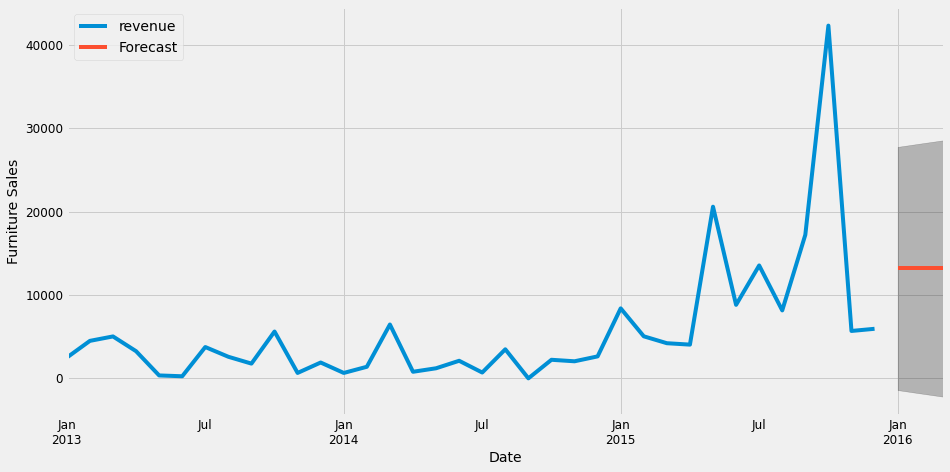

In [64]:
pred_uc = results.get_forecast(steps=3)
pred_ci = pred_uc.conf_int()
ax = store_sales_df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### Also try ARIMA model

In [45]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

stepwise_model = pm.auto_arima(store_sales_df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=491.322, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=495.599, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=488.277, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=488.622, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=489.176, Time=0.42 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=490.716, Time=0.14 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=485.594, Time=0.35 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=489.474, Time=0.50 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=488.626, Time=0.39 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=487.701, Time=0.51 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=inf, T

In [46]:
train = store_sales_df.loc[:'2015-05-01']
test = store_sales_df.loc['2015-05-01':]

In [52]:
results_ARIMA = stepwise_model.fit(train)

In [53]:
future_forecast = stepwise_model.predict(n_periods=8)# This returns an array of predictions:>>>
print(future_forecast)

[1941.28792802 1973.52416221 4828.93247947 4184.18556632 3011.68797708
 6645.85373474 2312.50223632 3473.87422127]


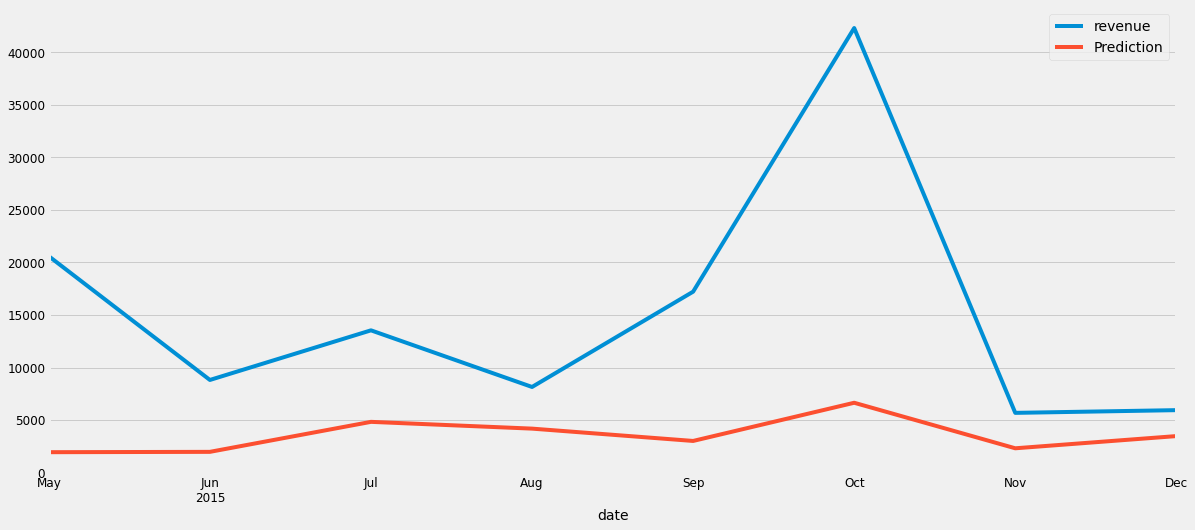

In [54]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

In [55]:
print(results_ARIMA.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9996      0.536     -1.863      0.062      -2.051       0.052
ar.S.L12      -0.8676      0.132     -6.555      0.000      -1.127      -0.608
sigma2      4.154e+06   1.29e-07   3.22e+13      0.000    4.15e+06    4.15e+06


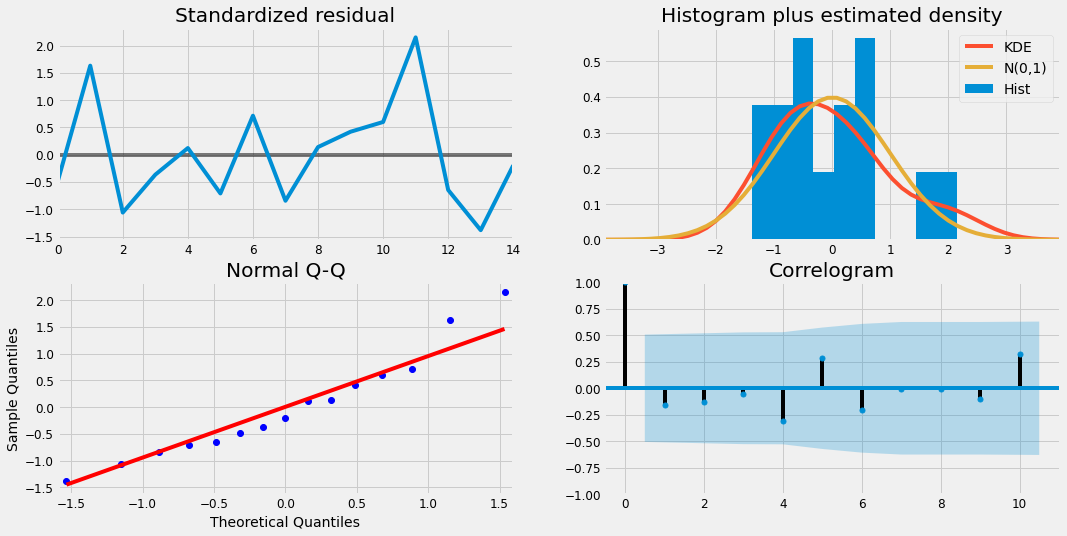

In [57]:
try:
    results_ARIMA.plot_diagnostics(figsize=(16, 8))
    plt.show()
except:
    pass

In [72]:
prediction_list = future_forecast.Prediction.tolist()

In [76]:
test_list = test.revenue.tolist()

In [78]:
# Mean Squared Error 
MSE = np.square(np.subtract(test_list,prediction_list)).mean() 
MSE

247160977.81044436